#Importing Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Loading Data

In [124]:
df= pd.read_csv("car data.csv")

In [125]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [126]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Dimensions of Dataset

In [127]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  301
Number of Columns:  9


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Statistic Summary

In [129]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Missing Values

In [130]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

There is no missing values in dataset

# Duplicate Values

In [131]:
df.duplicated().values.sum()

2

# Drop Duplicated Values

In [132]:
#df.drop_duplicates(inplace=True)

# Checking

In [133]:
#df.duplicated().values.sum()

# checking for the distribution of Categorical data

In [134]:
print("Fuel Type")
print(df["Fuel_Type"].value_counts())
print("\nSelling Type")
print(df["Selling_type"].value_counts())
print("\nTransmission")
print(df["Transmission"].value_counts())

Fuel Type
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Selling Type
Dealer        195
Individual    106
Name: Selling_type, dtype: int64

Transmission
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding Categorical Columns

In [135]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

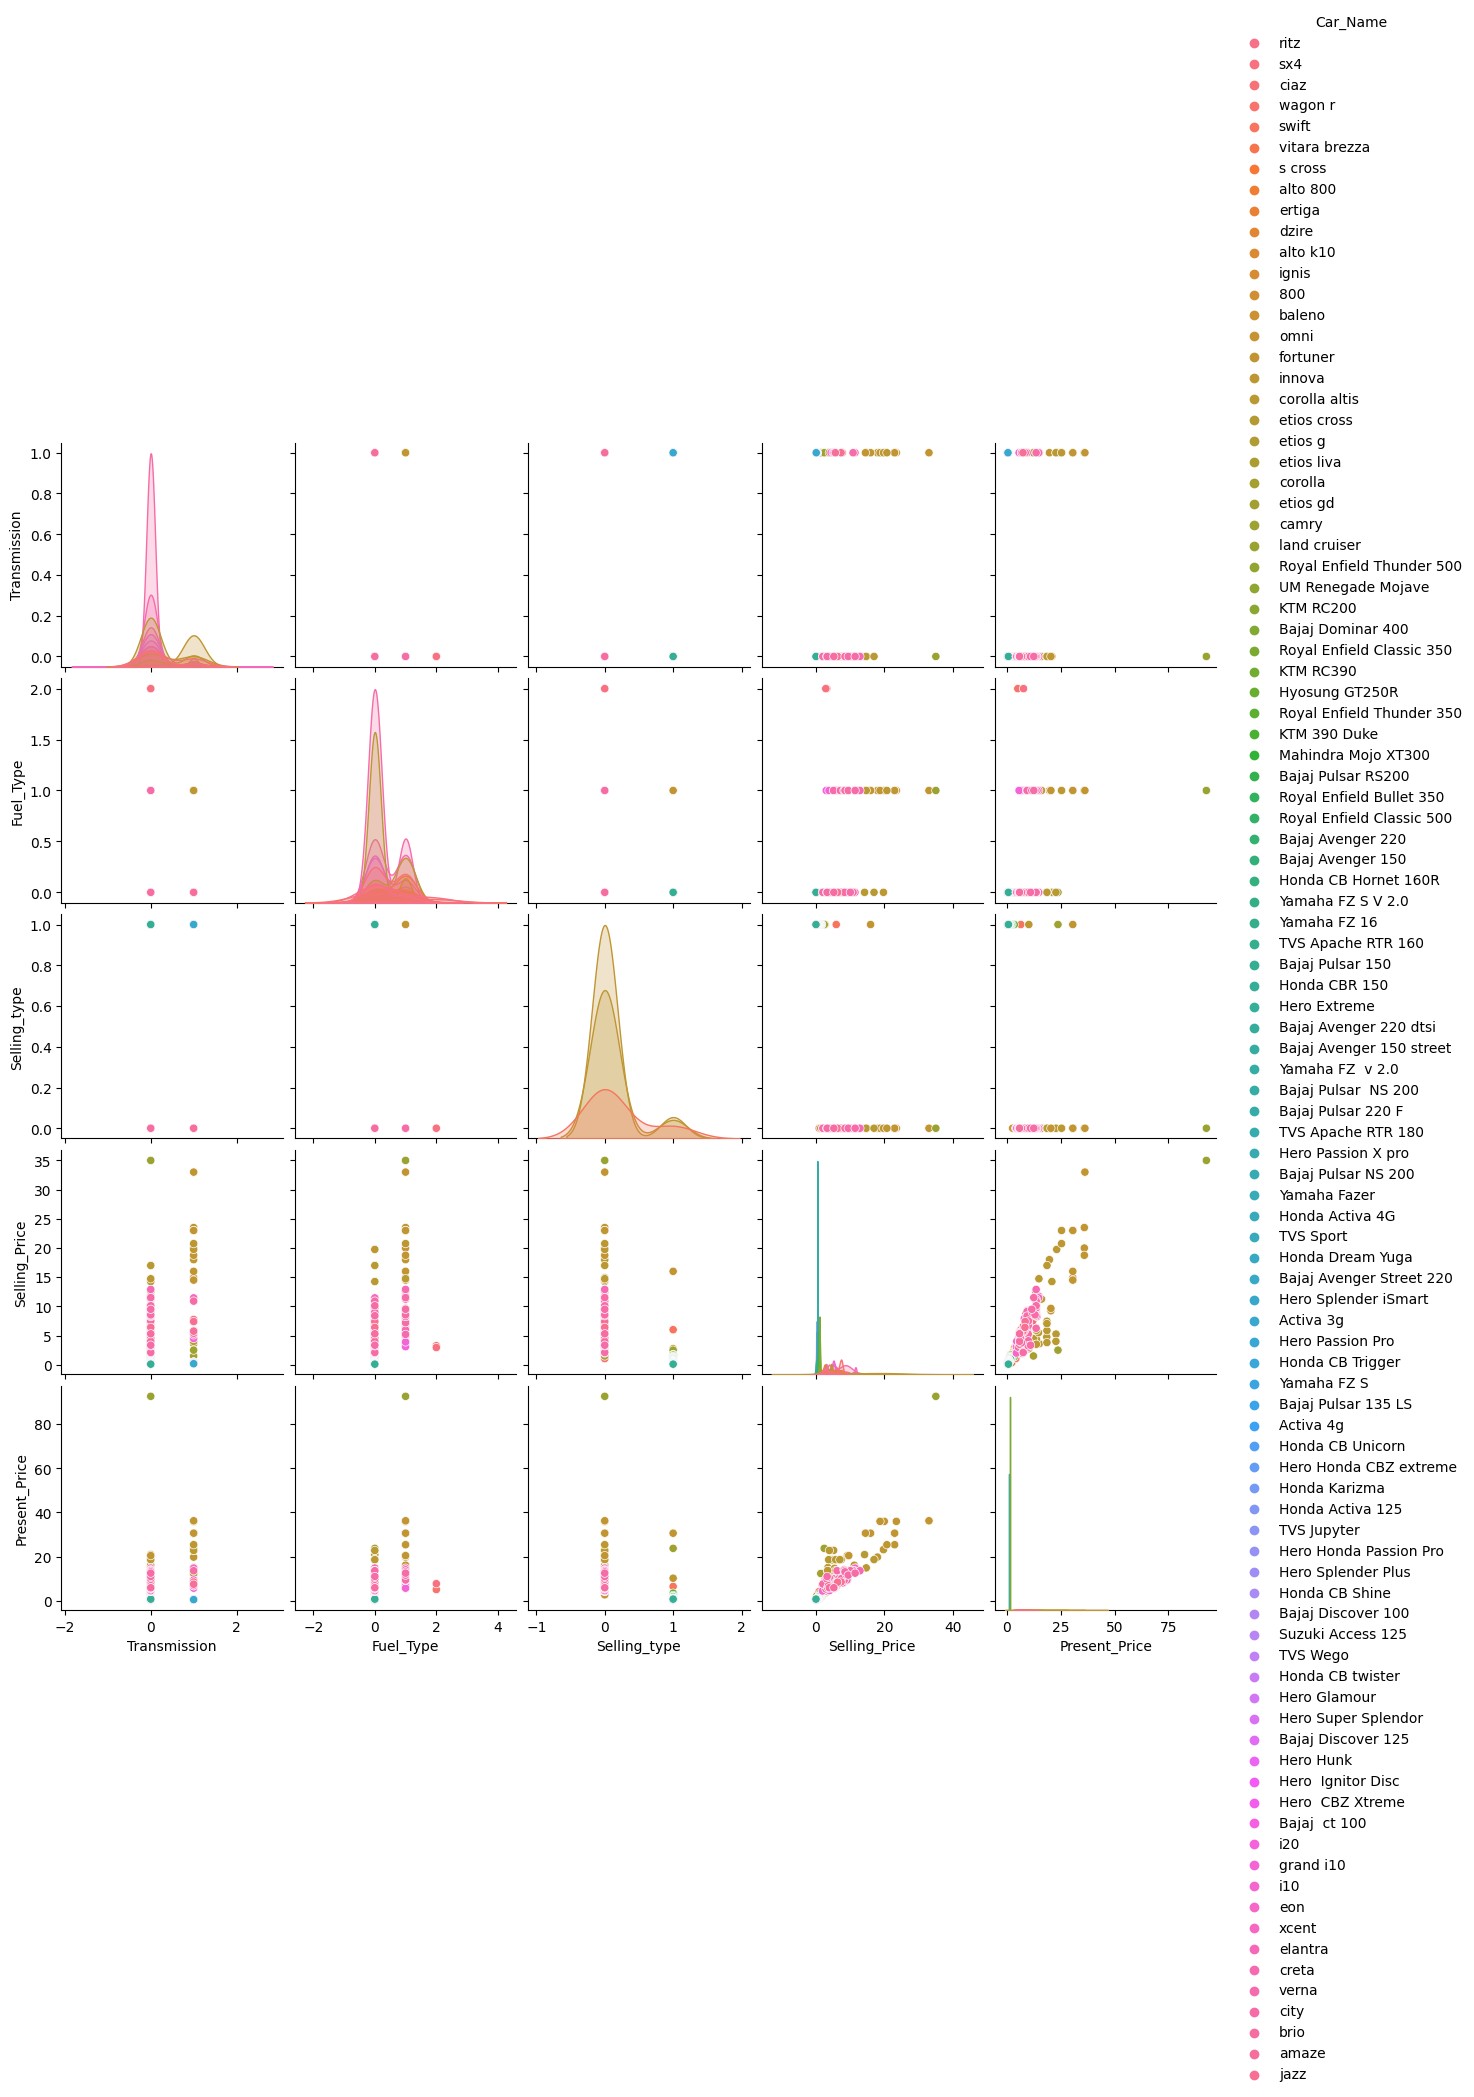

In [136]:
df1=df[["Transmission","Fuel_Type","Selling_type", "Car_Name","Selling_Price","Present_Price"]]
sns.pairplot(df1 , hue="Car_Name")
plt.show()

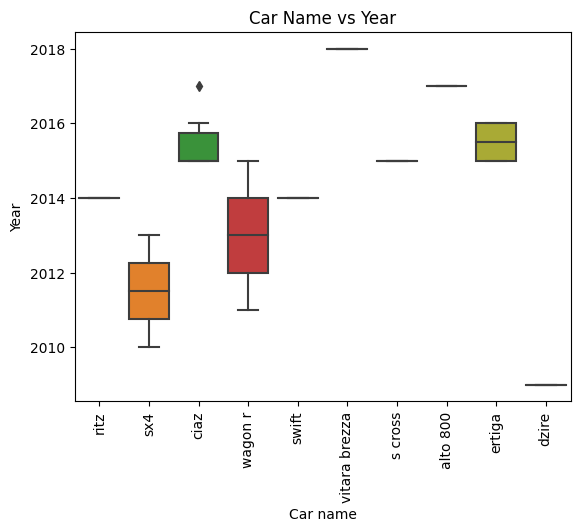

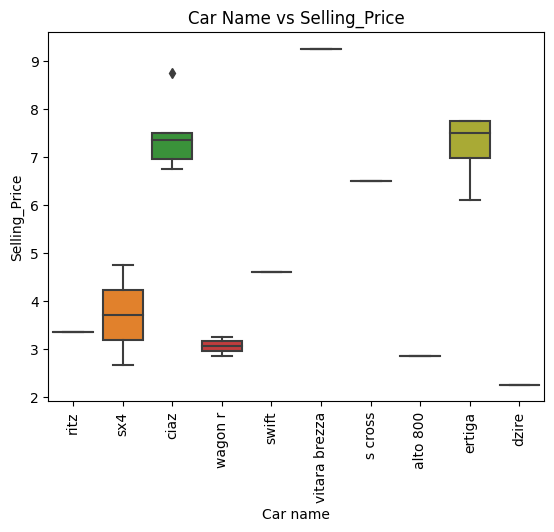

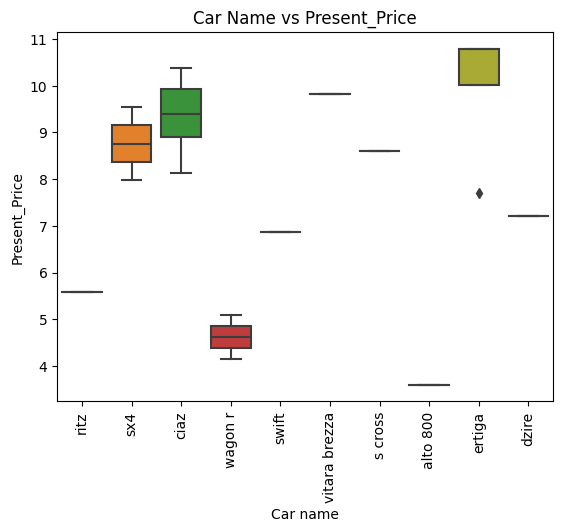

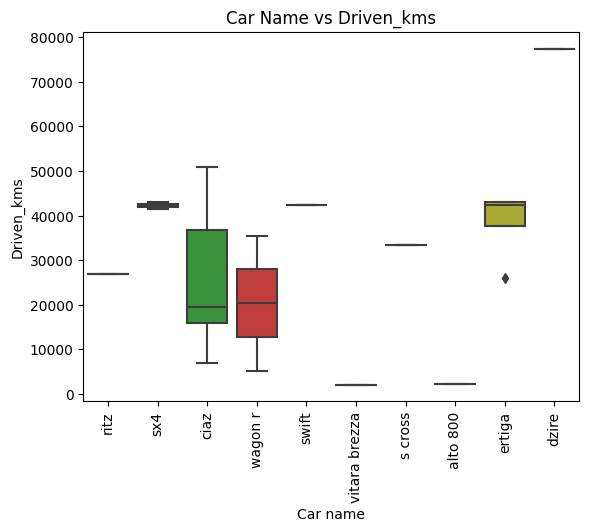

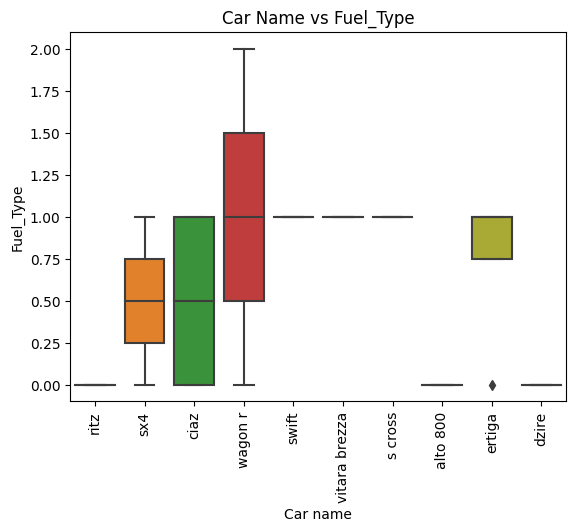

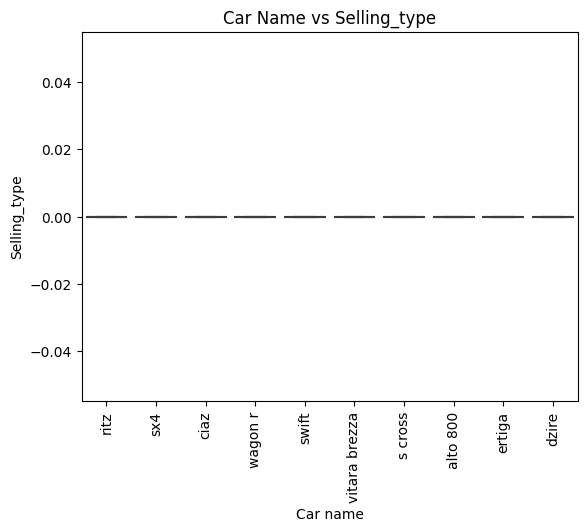

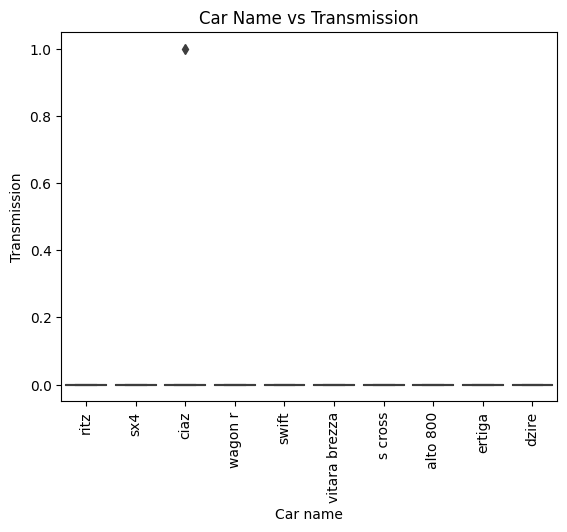

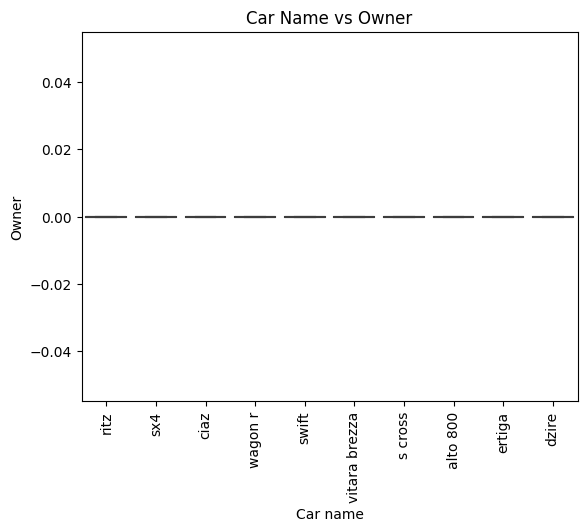

In [137]:
max_rows = 20
for i in df.columns:
    if i != "Car_Name":
        sns.boxplot(x=df["Car_Name"][:max_rows], y=df[i][:max_rows], data=df)
        plt.title("Car Name vs %s" % i)
        plt.xlabel("Car name")
        plt.ylabel(i)
        plt.xticks(rotation=90)  # Set the x-axis labels to "Car_Name" with 90-degree rotation
        plt.show()



#Correlation

In [138]:
df.corr()

<ipython-input-138-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.440493,-0.512121,0.348776,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440493,0.166801,1.000000,-0.352415,0.080466,-0.055705
Selling_type,-0.039896,-0.550724,-0.512121,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348776,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008058,0.089216,-0.055705,0.124269,0.050316,1.000000


<ipython-input-139-c48a98235990>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="BuPu")


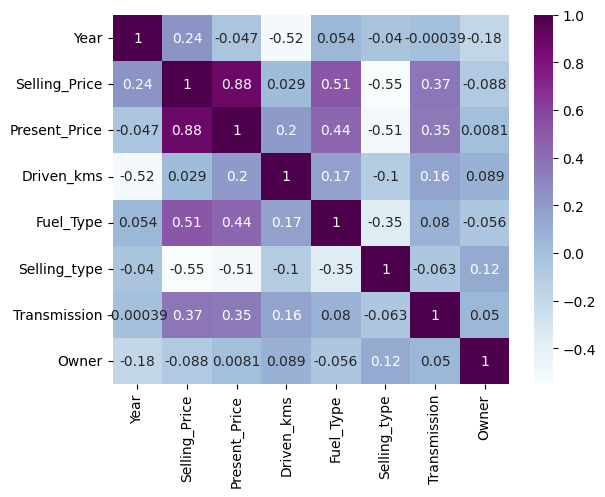

In [139]:
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.show()

#top selling price of car According to Year

In [140]:
top_10=df.nlargest(10,"Selling_Price")[["Year","Car_Name","Selling_Price"]].set_index("Car_Name")
print(top_10)

              Year  Selling_Price
Car_Name                         
land cruiser  2010          35.00
fortuner      2017          33.00
fortuner      2015          23.50
fortuner      2015          23.00
innova        2017          23.00
fortuner      2015          23.00
innova        2016          20.75
fortuner      2014          19.99
innova        2017          19.75
fortuner      2014          18.75


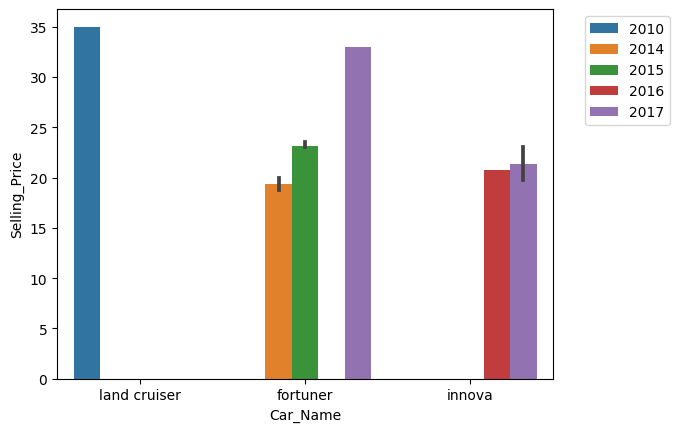

In [141]:
sns.barplot(x=top_10.index, y="Selling_Price", data=top_10,hue="Year",dodge=True)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()

#Model Training

In [142]:
from  sklearn.model_selection import train_test_split
X=df.drop(["Car_Name","Selling_Price"],axis=1)
Y=df["Selling_Price"]
#test 10%
#train 90%
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.1,random_state=2)

In [143]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [144]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#Decision Tree Regression

In [145]:
# Import the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Fit the model to your training data
regressor.fit(X_train, Y_train)

# Make predictions
y_pred = regressor.predict(X_test)


In [146]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(Y_test, y_pred)

print("Mean Absolute Error:", mae*100)


Mean Absolute Error: 51.870967741935495


In [147]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test,y_pred)
print("R squared Error : ", error_score * 100)

R squared Error :  92.72791741794357


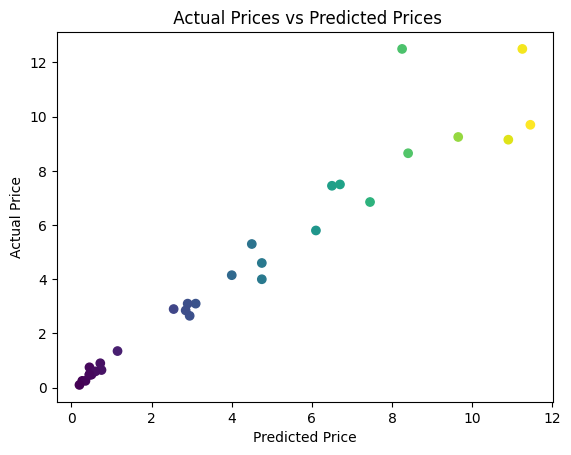

In [148]:
plt.scatter(Y_test, y_pred,c=Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()